In [62]:
import numpy as np
import pandas as pd

#Bibloteki do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns

# Model regresji liniowej z bibloteki scikit-learn
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [6]:
def get_X():
    tablica = np.random.rand(100, 1)
    
    return 2 * tablica


def get_y(X):
    tablica = np.random.randn(100, 1)
    
    return 3 + 5 * X + tablica


In [7]:
X = get_X()
y = get_y(X)

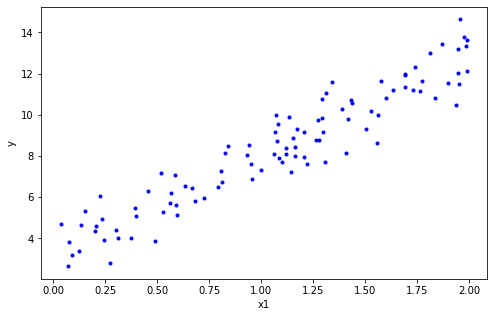

In [13]:
plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X, y, 'b.')
plt.show()

# Regresja grzebietowa

In [17]:
alpha = 1

## Własna implementacja

In [48]:
def h(X, theta):
    return np.dot(X, theta)

In [49]:
X_p =  np.hstack((np.ones((X.shape[0],1)), X))
y_p = np.reshape(y, (100,1))

In [51]:
theta = np.linalg.inv(X_p.T.dot(X_p) + alpha * np.eye(X_p.shape[1])).dot(X_p.T).dot(y)

In [54]:
theta

array([[3.25979859],
       [4.73720804]])

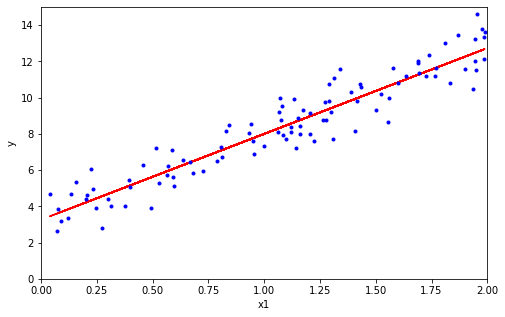

In [53]:
y_pred = h(X_p, theta)

plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

## Sklearn

In [42]:
ridge_reg = Ridge(alpha=alpha, solver='cholesky')
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [43]:
print('theta0 = ', ridge_reg.intercept_[0])
print('theta1 = ', ridge_reg.coef_[0][0])

theta0 =  3.4050737901818504
theta1 =  4.632380576355853


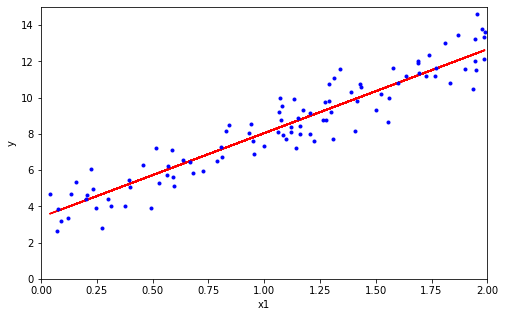

In [44]:
y_pred = ridge_reg.predict(X)

plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [45]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())

SGDRegressor()

In [46]:
print('theta0 = ', sgd_reg.intercept_[0])
print('theta1 = ', sgd_reg.coef_[0])

theta0 =  3.470072174484714
theta1 =  4.593692441045385


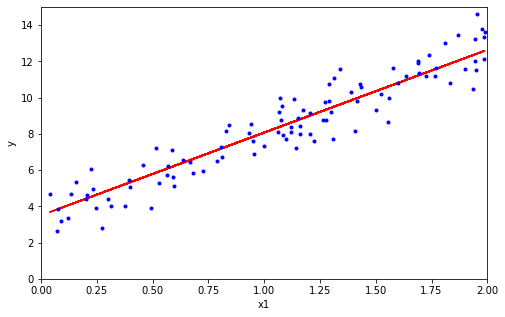

In [22]:
y_pred = sgd_reg.predict(X)

plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

# Regresja metodą LASSO

In [56]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [60]:
print('theta0 = ', lasso_reg.intercept_[0])
print('theta1 = ', lasso_reg.coef_[0])

theta0 =  3.5830071171186786
theta1 =  4.466843116364734


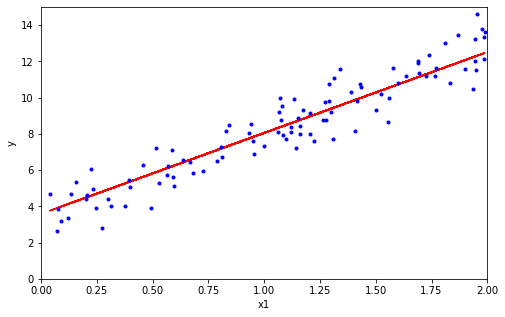

In [61]:
y_pred = lasso_reg.predict(X)

plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

# Metoda elastycznej siatki

In [63]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1)

In [64]:
print('theta0 = ', elastic_net.intercept_[0])
print('theta1 = ', elastic_net.coef_[0])

theta0 =  4.080857310163189
theta1 =  4.003676053558472


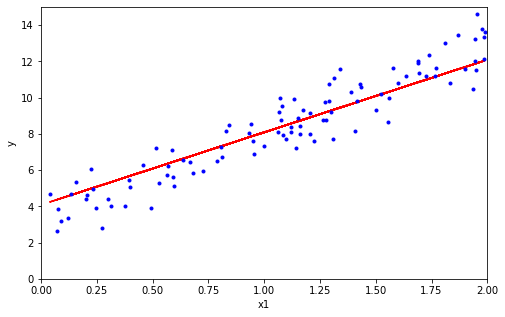

In [65]:
y_pred = elastic_net.predict(X)

plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()